# Decriminalization of drugs

## Perspective 1 - Drugs should be legalized to stop drug criminalization
### First argument: Reduction in crime rates
#### Argument: Legalization reduces drug-related crime.
The first dataset focusses on drug related crimes and can be found with the following link: https://www.unodc.org/unodc/en/data-and-analysis/wdr2022_annex.html
<br>
The variables in this dataset are: 'Region', 'SubRegion', 'Country/Territory', 'Type of offence', 'Year', 'Drugs', 'Total', 'Males', 'Females', 'Unknown/Other/Third/Intersex', 'Adults', 'Juveniles', 'Specify year'. For the analyses and data visualisation we have filtered the data to the region Europe, dropped the NaN rows and only focussed on the variables 'Country/Territory', 'Year' and 'Total'. 

In [15]:
# ! pip3 install dash
# ! pip install dash

# import pandas as pd
# import numpy as np
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.graph_objs as go
# import plotly.express as px

# # makeing a dataframe with the data of two separate datasets of the amount of crimes per country, per year. 
# # Most values align, but some are missing in one dataset and not in the other
# # To make the dataframe as complete as possible, we'll combine the two datasets

# crimes_1 = pd.read_csv("DLOs_europe_1.csv")
# crimes_2 = pd.read_csv("DLOs_europe_2.csv")

# crimes_df1 = pd.DataFrame(crimes_1)
# crimes_df2 = pd.DataFrame(crimes_2)

# years = ['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007']

# # Function to compare values from the two dataframes and return a combined value
# def compare_values(self_value, other_value):

#     # if both are Nan, keep Nan in the dataset
#     if pd.isna(self_value) and pd.isna(other_value):
#         return np.nan

#     # if one value is NaN, keep the value of the other dataset
#     elif pd.isna(self_value):
#         return other_value
#     elif pd.isna(other_value):
#         return self_value
    
#     # if values are the same
#     elif self_value == other_value:
#         return self_value

#     # if values are different, keep the mean
#     else:
#         return (self_value + other_value) / 2

# # Create a new dictionary to store the combined data from the two dataframes
# combined_crimes = {'Country': crimes_df1['Country']}

# # Loop through each year to process the data for that year
# for year in years:

#     # Check if the year exists in both dataframes
#     if year in crimes_df1.columns and year in crimes_df2.columns:
        
#         # For each row, apply a the compare_values() function to compare and combine the values from both dataframes
#         combined_crimes[year] = crimes_df1.apply(
#             lambda row: compare_values(

#                 # Value from the first dataframe
#                 row[year], 

#                 # Corresponding value from the second dataframe
#                 crimes_df2.loc[crimes_df2['Country'] == row['Country'], year].values[0]

#                 # Use np.nan if the country is not in the second dataframe
#                 if row['Country'] in crimes_df2['Country'].values else np.nan 

#             ), axis=1
#         )
        
#     # If the year exists only in the first dataframe, use those values
#     elif year in crimes_df1.columns:
#         combined_crimes[year] = crimes_df1[year]

#     # Same for the second dataframe
#     elif year in crimes_df2.columns:
#         combined_crimes[year] = crimes_df2[year]

#     # If the year exists in neither dataframe, use np.nan
#     else:
#         combined_crimes[year] = np.nan

# # Convert the dictionary to a DataFrame
# crimes_combined_df = pd.DataFrame(combined_crimes)


# # Making a dataframe for amount of crimes per 1000 inhabitants

# inhabitants = pd.read_csv("Population_europe.csv")
# inhabitants_df = inhabitants[['Country Name'] + years].copy()
# inhabitants_df.rename(columns={'Country Name': 'Country'}, inplace=True)

# # Function to calculate the number of crimes per 1000 inhabitants
# def calc_per_100_inhabitants(row, year):
#     if pd.isna(row[f'{year}']):
#         return np.nan
#     else:
#         return round(row[f'{year}'] / (inhabitants_df.at[row.name, f'{year}'] / 1000), 3)

# # Create a new DataFrame with the crime data per 1000 inhabitants
# per_inhabitants_df = crimes_combined_df.copy()

# for year in years:
#     if year in crimes_combined_df.columns and year in inhabitants_df.columns:
#         per_inhabitants_df[year] = crimes_combined_df.apply(lambda row: calc_per_100_inhabitants(row, year), axis=1)

# per_inhabitants_df.reset_index(drop=True, inplace=True)

# # make interactive barplot

# app = dash.Dash(__name__)

# # html layout of the Dash application
# app.layout = html.Div([
#     html.H1("Comparison of the amount of drug crimes per year in portugal and other countries"),

#     html.Label("Select countries (Portugal is always included):"),
#     dcc.Dropdown(
#         id='country-selector',
#         options=[{'label': i, 'value': i} for i in crimes_combined_df['Country'].unique() if i != 'Portugal'],
#         value=['France', 'Spain'], 
#         multi=True
#     ),

#     html.Label("Selecteer Jaren:"),
#     dcc.Dropdown(
#         id='year-selector',
#         options=[{'label': i, 'value': i} for i in crimes_combined_df.columns if i != 'Country'],
#         value=['2021', '2017','2012', '2007'], 
#         multi=True
#     ),
#     html.Label("Select Scale:"),
#     dcc.Dropdown(
#         id='scale-selector',
#         options=[
#             {'label': 'Linear', 'value': 'linear'},
#             {'label': 'Logarithmic', 'value': 'log'}
#         ],
#         value='log', 
#     ),
#     html.Label("Select unit:"),
#     dcc.Dropdown(
#         id='data-selector',
#         options=[
#             {'label': 'Totaal amount of cases', 'value': 'total'},
#             {'label': 'cases/1000 inhabitants', 'value': 'per_inhabitants'}
#         ],
#         value='total', 
#     ),
#     dcc.Graph(id='bar-plot'),
#     html.Div(id='missing-data-warning', style={'color': 'red', 'margin-top': '20px'})
# ], style={'backgroundColor': 'lightgrey', 'padding': '20px'})

# # Define the callback to update the graph and warning text
# @app.callback(
#     [Output('bar-plot', 'figure'), Output('missing-data-warning', 'children')],
#     [Input('country-selector', 'value'),
#      Input('year-selector', 'value'),
#      Input('scale-selector', 'value'),
#      Input('data-selector', 'value')]
# )

# def update_graph(selected_countries, selected_years, selected_scale, selected_data):
#     selected_countries.append('Portugal') 

#     # Choose the correct dataset based on the selected data type
#     filtered_df = per_inhabitants_df if selected_data == 'per_inhabitants' else crimes_combined_df

#     # Filter the dataframe based on the selected countries and years
#     selected_countries_df = filtered_df[filtered_df['Country'].isin(selected_countries)].copy()
#     final_df = selected_countries_df.melt(id_vars=['Country'], value_vars=selected_years, var_name='Year', value_name='Cases')
    
#     # make sure Portugal is always the first country in the plots
#     country_order = ['Portugal'] + sorted([c for c in selected_countries if c != 'Portugal'])
    
#     bars = []
#     missing_data_info = []
#     warning_text = ""

#     # Loop through each country to create bar plots and track missing data
#     for country in country_order:
#         country_data = final_df[final_df['Country'] == country]
#         bars.append(go.Bar(
#             x=country_data[pd.notna(country_data['Cases'])]['Year'],
#             y=country_data[pd.notna(country_data['Cases'])]['Cases'],
#             name=country
#         ))

#         nan_data = country_data[pd.isna(country_data['Cases'])]
#         if not nan_data.empty:
#             missing_data_info.append(f"{country} ({', '.join(nan_data['Year'])})")
    
#     fig = go.Figure(data=bars)
#     fig.update_layout(
#         paper_bgcolor='lightgrey',
#         plot_bgcolor='white', 
#         font=dict(color='black'),  
#         yaxis_type=selected_scale,
#         title= "Amount of drug crimes per year for the selected years and countries",
#         xaxis_title="Year", 
#         yaxis_title= "Number of Crimes" if selected_data == 'total' else "Crimes per 1000 Inhabitants"
#     )

#     # Generate the warning text for missing data
#     warning_text = ""
#     if missing_data_info:
#         warning_text = "Please note that the following countries/years contain missing data: " + "; ".join(missing_data_info)
    
#     return fig, warning_text

# # Run the Dash application
# if __name__ == '__main__':
#     app.run_server(debug=True , port=8058)

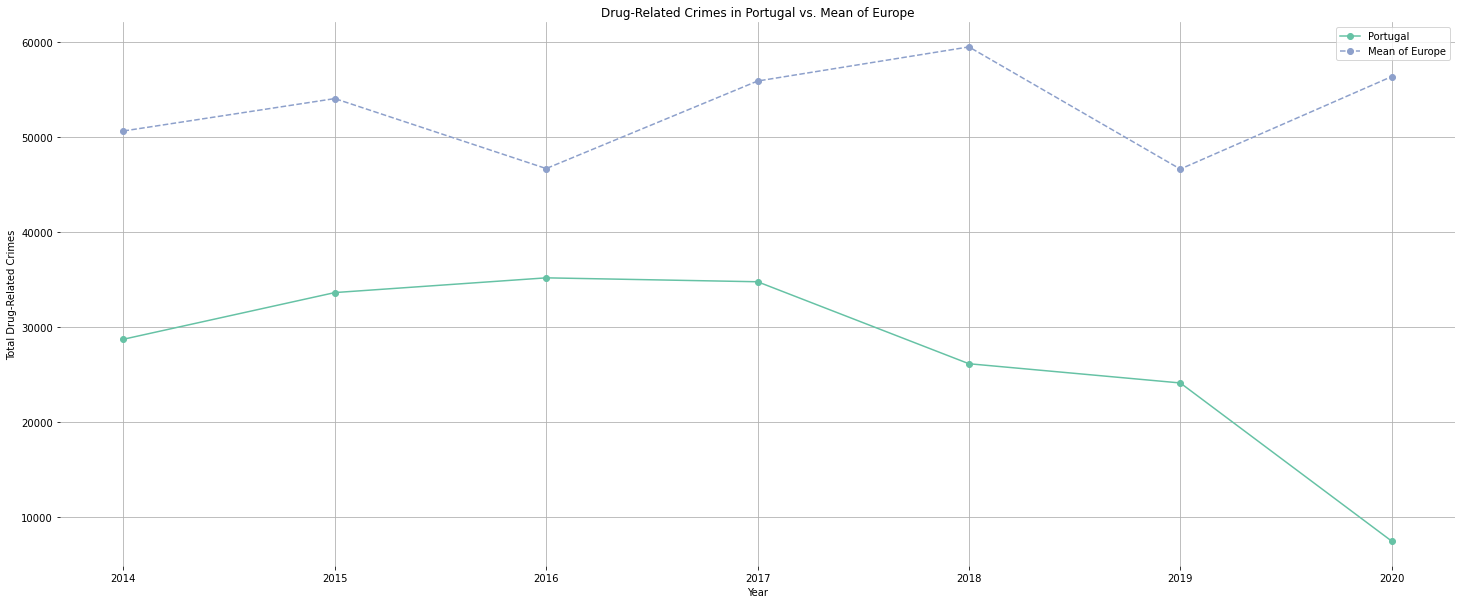

Figure 1: Drug-Related crimes in Portugal vs. Mean of Europe, from 2014 until 2020


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("9_Misdaden.csv")

# Filter for Europe
europe_df = df[df['Region'] == 'Europe']

# Group by Country/Territory and Year, and sum the Total crimes
grouped_df = europe_df.groupby(['Country/Territory', 'Year']).agg({'Total': 'sum'}).reset_index()

# Filter for Portugal
portugal_df = grouped_df[grouped_df['Country/Territory'] == 'Portugal']

# Calculate the mean for Europe (excluding Portugal)
europe_mean_df = grouped_df[grouped_df['Country/Territory'] != 'Portugal'].groupby('Year').agg({'Total': 'mean'}).reset_index()
europe_mean_df.rename(columns={'Total': 'Mean of Europe'}, inplace=True)

# Merge Portugal data with Europe mean data
merged_df = pd.merge(portugal_df, europe_mean_df, on='Year', how='left')

# Plotting
fig, ax = plt.subplots(figsize=(25, 10))
# fig.patch.set_facecolor('#FDE1F0')  # Light pink background for the entire figure
# fig.patch.set_edgecolor('#FDE1F0')
# ax.set_facecolor('#FDE1F0')  # Light pink background for the plot area

# Remove axes spines (borders)
for spine in ax.spines.values():
    spine.set_visible(False)  # Hide all spines (borders)


ax.plot(merged_df['Year'].values, merged_df['Total'].values, label='Portugal', marker='o', color='#66c2a5')  # Pastel green
ax.plot(merged_df['Year'].values, merged_df['Mean of Europe'].values, label='Mean of Europe', marker='o', linestyle='--', color='#8da0cb')  # Pastel blue

ax.set_xlabel('Year')
ax.set_ylabel('Total Drug-Related Crimes')
ax.set_title('Drug-Related Crimes in Portugal vs. Mean of Europe')

# Set the legend
ax.legend()

# Enable the grid
ax.grid(True)

# Show the plot
plt.show()

# Set the subtitle text
subtitle = "Figure 1: Drug-Related crimes in Portugal vs. Mean of Europe, from 2014 until 2020"
print(subtitle)

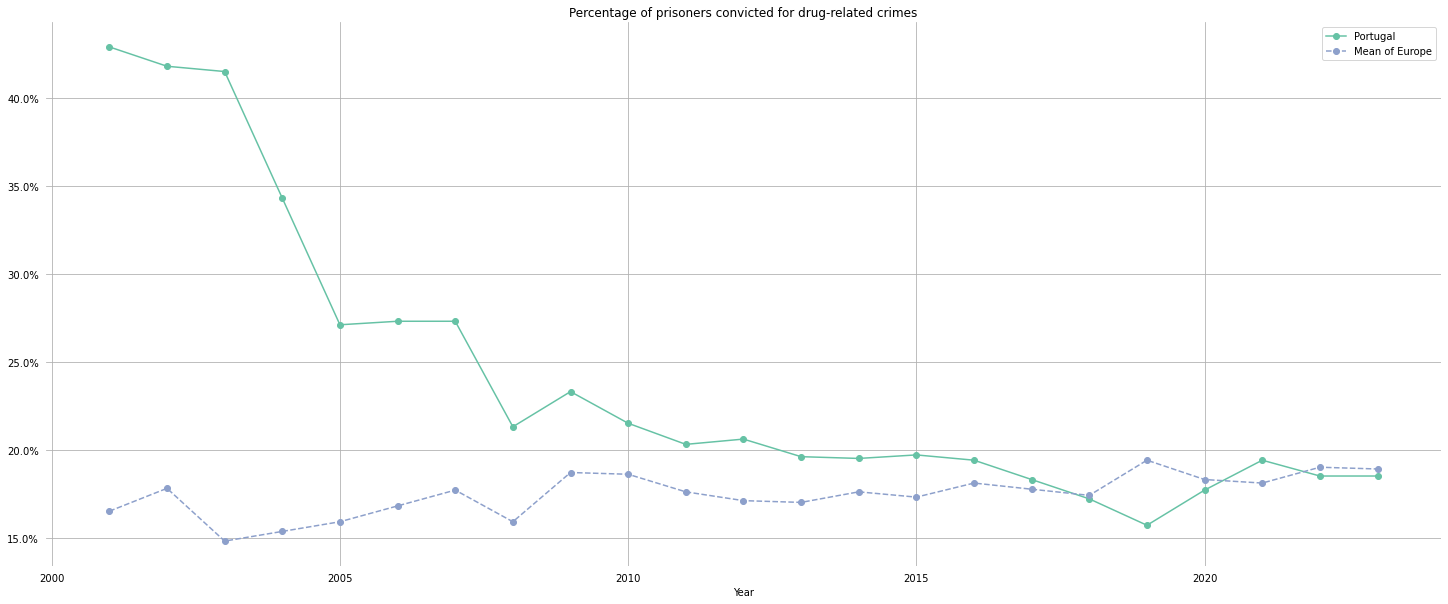

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd

# Read the CSV file
drug_offences_df = pd.read_csv('drug_offences.csv')

# Interpolate missing values
drug_offences_df = drug_offences_df.interpolate()

# Plotting
plt.figure(figsize=(25, 10))
plt.plot(drug_offences_df['Year'].values, drug_offences_df['Percentage of prisoners sentenced for drug offences in Portugal'].values, label='Portugal', marker='o', color='#66c2a5')  # Pastel green
plt.plot(drug_offences_df['Year'].values, drug_offences_df['Mean Europe'].values, label='Mean of Europe', marker='o', linestyle='--', color='#8da0cb')  # Pastel blue

plt.title('Percentage of prisoners convicted for drug-related crimes')
plt.xlabel('Year')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend()

# Remove axis lines (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Hide ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Show the plot
plt.grid(True)
plt.show()

## Second Perspective - Drugs should not be legalized because of the potential for increased addiction and health issues
### First argument: Increase in addiction rates
#### Argument: Legalization leads to higher rates of substance abuse and addiction.
DRAFT 
<br>
Supporting Data: Correlation between drug legalization and addiction rates.
<br>
Data Variables: Addiction rates (before and after legalization), rates of treatment admissions for addiction, types of substances used.
<br>
Data visualisation: For example a (interactive) thematic map of US states with addiction rates. Another visualisation containing a line or bar chartshowing the addiction rates before and after legalization. 

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning:

divide by zero encountered in true_divide



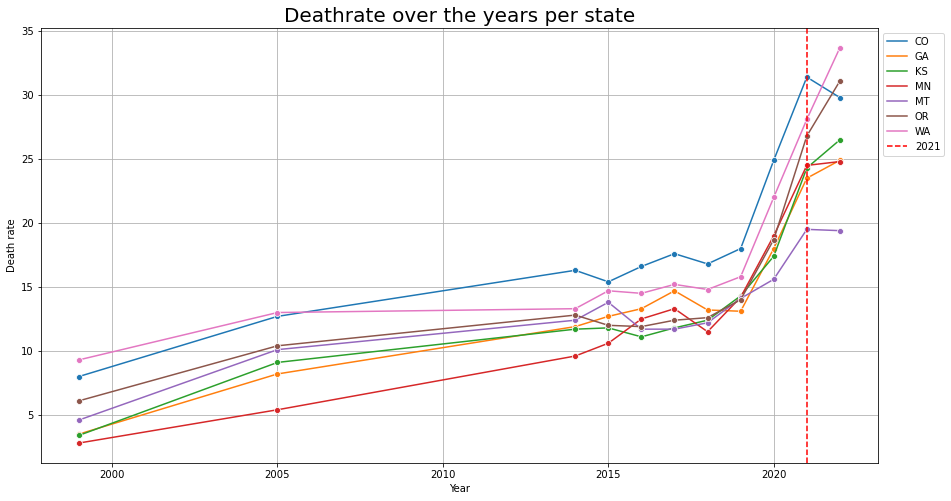

Figure 3: Deathrate of drug overdose mortality for the states Colorado, Georgia, Kansas, Minnesota, Montana, Oregon and Washington.


In [18]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns

statesdata = pd.read_csv("statesdata.csv")

statesdata = statesdata[["YEAR","STATE","RATE"]]

pivot_df = statesdata.pivot_table(index='YEAR', columns='STATE', values='RATE')
or_correlations = pivot_df.corrwith(pivot_df['OR']).drop('OR')

# states selected for hight correlation and matching rates
desired_states = ['OR','CO','GA', 'KS','MN','MT','WA']
statesdata = statesdata[statesdata['STATE'].isin(desired_states)]

plt.figure(figsize=(15, 8))
sns.lineplot(data=statesdata, x='YEAR', y='RATE', hue='STATE', palette='tab10', marker='o')
plt.axvline(x=2021, color='red', linestyle='--', label='2021')
plt.xlabel('Year')
plt.ylabel('Death rate')
plt.title('Deathrate over the years per state', fontsize=20)
plt.legend(fontsize=0.2)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

# Set the subtitle text
subtitle = "Figure 3: Deathrate of drug overdose mortality for the states Colorado, Georgia, Kansas, Minnesota, Montana, Oregon and Washington."
print(subtitle)

In [19]:
import pandas as pd
from pandas import *
import plotly.graph_objs as go

df = pd.read_csv("statesdata.csv")
df.columns = df.columns.str.strip()

# Check for 'YEAR' column
if 'YEAR' not in df.columns:
    raise KeyError("The 'YEAR' column is missing or misspelled in the DataFrame.")

# Calculate min and max values for RATE to set fixed color scale
min_rate = df['RATE'].min()
max_rate = df['RATE'].max()

# Sort years to ensure the slider goes from earliest to latest year
years = sorted(df['YEAR'].unique())

# Initialize the figure
fig = go.Figure()

# Create a choropleth map for each year and add it to the figure
for year in years:
    filtered_df = df[df['YEAR'] == year]
    fig.add_trace(
        go.Choropleth(
            locations=filtered_df['STATE'],
            z=filtered_df['RATE'],
            locationmode='USA-states',
            colorscale='Turbo',
            zmin=min_rate,
            zmax=max_rate,
            hovertext=filtered_df['STATE'],
            hoverinfo='location+z+text',
            visible=False,
            name=str(year)
        )
    )

# Make the first trace visible
fig.data[0].visible = True

# Create sliders
steps = []
for i, year in enumerate(years):
    step = dict(
        method='update',
        args=[{'visible': [j == i for j in range(len(fig.data))]},
              {'title': f'US Data for {year} - Death Rate'}],
        label=str(year)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    x=0.02,  # Move the slider more to the left
    xanchor='left',
    y=0,
    yanchor='top',
    pad=dict(t=50)
)]

# Add the sliders to the figure
fig.update_layout(
    title_text=f'US Data for {years[0]} - Death Rate',
    geo=dict(
        scope='usa',
        lakecolor='rgb(255, 255, 255)',
        projection=dict(type='albers usa'),
        showlakes=True,
        subunitcolor="rgb(255, 255, 255)",
    ),
    margin=dict(l=50, r=50, t=50, b=50),
    sliders=sliders,
    height=800,  # Adjust the height as needed
)

# Show the interactive map
fig.show()

In [20]:
# ! pip3 install dash
# ! pip install dash

# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.graph_objects as go
# import pandas as pd
# import numpy as np

# years = ['2021','2020','2019','2018','2017','2016','2015','2014','2013']
# # Laad de dataset
# treatment_df = pd.read_csv("Treatment.csv")
# inhabitants = pd.read_csv("Population_europe.csv")
# inhabitants_df = inhabitants[['Country Name'] + years].copy()
# inhabitants_df.rename(columns={'Country Name': 'Country'}, inplace=True)

# # Functie om het aantal per 1000 inwoners te berekenen
# def calc_per_100_inhabitants(row, year):
#     if pd.isna(row[year]):
#         return np.nan
#     else:
#         return round(row[year] / (inhabitants_df.at[row.name, year] / 1000), 3)

# # Maak een echte kopie van het treatment_df voor berekeningen per 1000 inwoners
# per_inhabitants_df = treatment_df.copy()

# # Bereken het aantal per 1000 inwoners voor elk jaar
# for year in years:
#     if year in treatment_df.columns and year in inhabitants_df.columns:
#         per_inhabitants_df[year] = treatment_df.apply(lambda row: calc_per_100_inhabitants(row, year), axis=1)

# per_inhabitants_df.reset_index(drop=True, inplace=True)

# app2 = dash.Dash(__name__)

# app2.layout = html.Div([
#     html.H1("Een hele mooie titel, die ga ik nog bedenken..."),

#     html.Label("Select countries (Portugal is always included):"),
#     dcc.Dropdown(
#         id='country-selector',
#         options=[{'label': i, 'value': i} for i in treatment_df['Country'].unique() if i != 'Portugal'],
#         value=['France', 'Spain'], 
#         multi=True
#     ),
#     html.Label("Select Scale:"),
#     dcc.Dropdown(
#         id='scale-selector',
#         options=[
#             {'label': 'Linear', 'value': 'linear'},
#             {'label': 'Logarithmic', 'value': 'log'}
#         ],
#         value='linear', 
#     ),
#     html.Label("Select Unit:"),
#     dcc.Dropdown(
#         id='data-selector',
#         options=[
#             {'label': 'Total amount of cases', 'value': 'total'},
#             {'label': 'Cases/1000 inhabitants', 'value': 'per_inhabitants'}
#         ],
#         value='total', 
#     ),
#     dcc.Graph(id='line-chart'),
#     html.Div(id='missing-data-warning', style={'color': 'red', 'margin-top': '20px'})
# ], style={'backgroundColor': 'lightgrey', 'padding': '20px'})

# @app2.callback(
#     Output('line-chart', 'figure'),
#     [Input('country-selector', 'value'),
#      Input('scale-selector', 'value'),
#      Input('data-selector', 'value')]
# )
# def update_chart(selected_countries, selected_scale, selected_data):
#     selected_countries.append('Portugal')  # Zorg ervoor dat Portugal altijd wordt toegevoegd

#     # Kies de juiste dataset op basis van het geselecteerde data type
#     filtered_df = per_inhabitants_df if selected_data == 'per_inhabitants' else treatment_df

#     # Filter de dataframe op basis van de geselecteerde landen
#     selected_countries_df = filtered_df[filtered_df['Country'].isin(selected_countries)].copy()
#     final_df = selected_countries_df.melt(id_vars=['Country'], value_vars=years, var_name='Year', value_name='Cases')

#     country_order = ['Portugal'] + sorted([c for c in selected_countries if c != 'Portugal'])
    
#     # Maak de figuur
#     fig = go.Figure()

#     for country in country_order:
#         country_data = final_df[final_df['Country'] == country]
#         fig.add_trace(go.Scatter(
#             x=country_data['Year'],
#             y=country_data['Cases'],
#             mode='lines+markers',
#             name=country
#         ))

#     fig.update_layout(
#         title="Drug treatment demand",
#         xaxis_title="Year",
#         yaxis_title="Number of Cases" if selected_data == 'total' else "Cases per 1000 Inhabitants",
#         yaxis_type=selected_scale
#     )

#     return fig

# if __name__ == '__main__':
#     app2.run_server(debug=True, port=8055)

In [21]:
# import pandas as pd
# import plotly.graph_objects as go

# # Load the dataset
# df = pd.read_csv("15_deaths-due-to-illicit-drug-use-by-age.csv")

# # Function to update the plot based on the selected country
# def create_country_plot(selected_country):
#     country_df = df[df['Entity'] == selected_country].copy()
    
#     # Calculate cumulative deaths for stacking
#     country_df.loc[:, 'Cumulative 15-49 years'] = country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 15-49 years']
#     country_df.loc[:, 'Cumulative 50-69 years'] = country_df['Cumulative 15-49 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 50-69 years']
#     country_df.loc[:, 'Cumulative 70+ years'] = country_df['Cumulative 50-69 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 70+ years']
    
#     fig = go.Figure()
    
#     # Add traces for each age group, using cumulative values for stacking
#     fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'], fill='tozeroy', name='5-14 years'))
#     fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 15-49 years'], fill='tonexty', name='15-49 years'))
#     fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 50-69 years'], fill='tonexty', name='50-69 years'))
#     fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 70+ years'], fill='tonexty', name='70+ years'))
    
#     # Update plot layout
#     fig.update_layout(title=f'Drug-Related Deaths in {selected_country} by Age Group', xaxis_title='Year', yaxis_title='Cumulative Deaths', legend_title='Age Group')
    
#     fig.show()

# create_country_plot('Portugal')

###

import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("15_deaths-due-to-illicit-drug-use-by-age.csv")

# Filter data for a specific country (e.g., Portugal)
selected_country = 'Portugal'
country_df = df[df['Entity'] == selected_country].copy()

# Calculate cumulative deaths for stacking
country_df['Cumulative 15-49 years'] = country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 15-49 years']
country_df['Cumulative 50-69 years'] = country_df['Cumulative 15-49 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 50-69 years']
country_df['Cumulative 70+ years'] = country_df['Cumulative 50-69 years'] + country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 70+ years']

# Initialize the figure
fig = go.Figure()

# Add traces for each age group, using cumulative values for stacking
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Deaths that are from all causes attributed to drug use, in both sexes aged 5-14 years'], fill='tozeroy', name='5-14 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 15-49 years'], fill='tonexty', name='15-49 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 50-69 years'], fill='tonexty', name='50-69 years'))
fig.add_trace(go.Scatter(x=country_df['Year'], y=country_df['Cumulative 70+ years'], fill='tonexty', name='70+ years'))

# Update plot layout
fig.update_layout(title=f'Drug-Related Deaths in {selected_country} by Age Group', xaxis_title='Year', yaxis_title='Cumulative Deaths', legend_title='Age Group')

# Show the interactive plot within the Jupyter Notebook
fig.show()